# Sugarcane Production Project

## Loading the dataset

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv("Sugarcane.csv")

In [9]:
df.shape

(103, 7)

In [10]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Data Cleaning

In [11]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\1067177181.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\1067177181.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\1067177181.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Acreage (Hect

In [12]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [13]:
df = df.drop("Unnamed: 0", axis = 1)

In [14]:
df.rename(columns = {"Production (Tons)" : "Production(Tons)"}, inplace = True )
df.rename(columns = {"Production per Person (Kg)" : "Production_per_Person(Kg)"}, inplace = True )
df.rename(columns = {"Acreage (Hectare)" : "Acreage(Hectare)"}, inplace = True )
df.rename(columns = {"Yield (Kg / Hectare" : "Yield(Kg/Hectare"}, inplace = True )

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield (Kg / Hectare)         1
dtype: int64

In [17]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [18]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [19]:
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [20]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield (Kg / Hectare)         102
dtype: int64

In [21]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield (Kg / Hectare)         object
dtype: object

In [22]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [23]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield (Kg / Hectare)         float64
dtype: object

# Univariate Analysis

In [24]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#### How many countries produce sugarcane from eah continent?

In [25]:
df["Continent"].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

<Axes: >

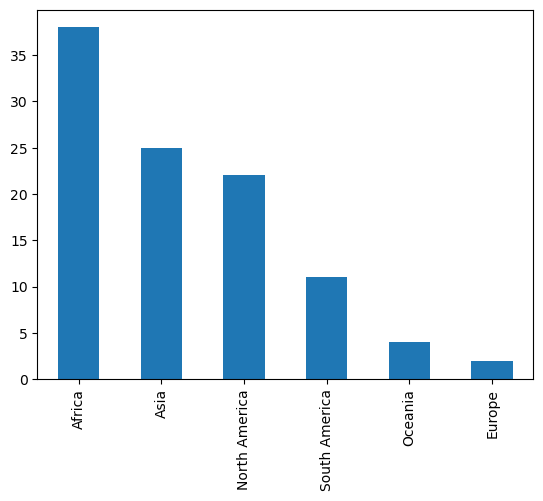

In [26]:
df["Continent"].value_counts().plot(kind = "bar")

Africa has maximum number of countries which producs most sugarcane.

## Checking Outliers

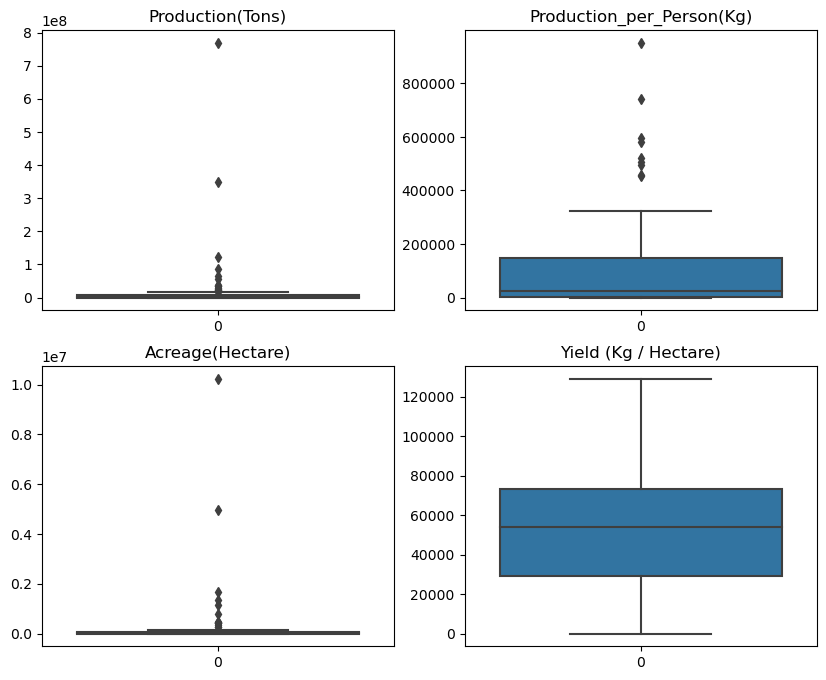

In [27]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")

plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_Person(Kg)")

plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")
plt.show()


We have outliers here but we can see the reason why,
because they show us which country produces the maximum amount of sugarcane. 

## Distribution of the Columns

C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\3018254196.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\3018254196.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person(Kg)"])
C:\Users\ZIA\AppDat

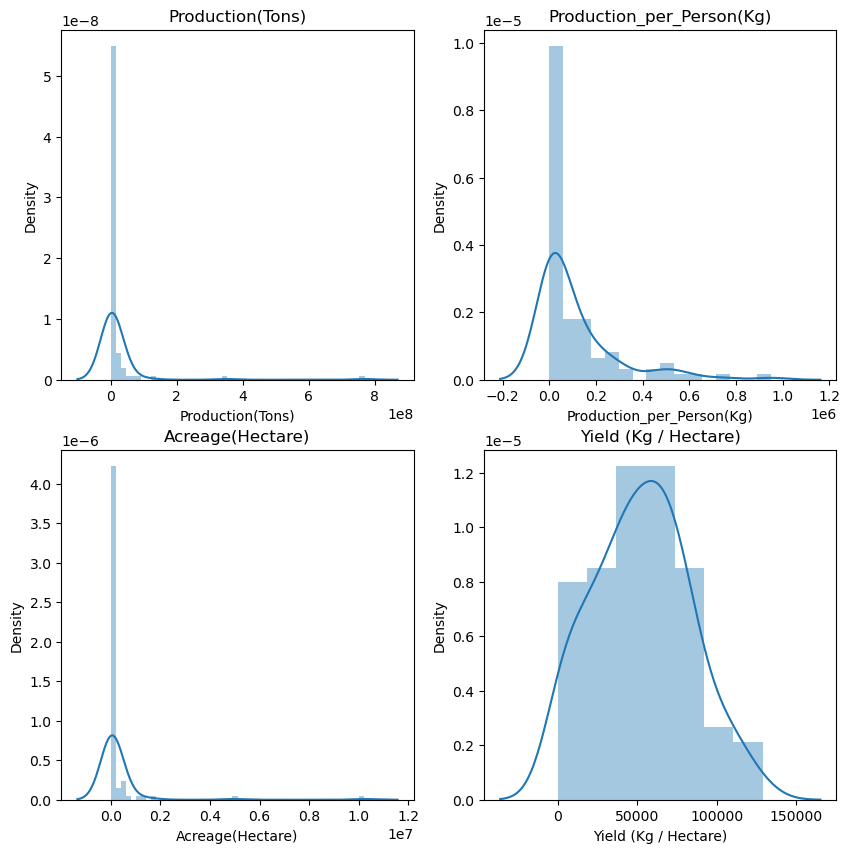

In [28]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")

plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_Person(Kg)")

plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])
plt.title("Yield (Kg / Hectare)")
plt.show()

<Axes: >

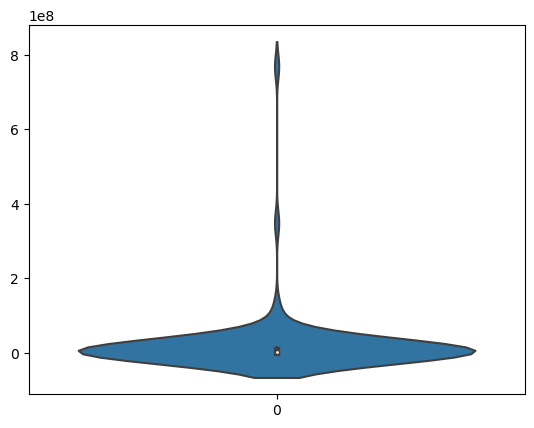

In [29]:
sns.violinplot(df["Production(Tons)"])

# Bivariate Analysis

In [30]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#### which country produces maximum sugarcane?

In [31]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [32]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [33]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [34]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

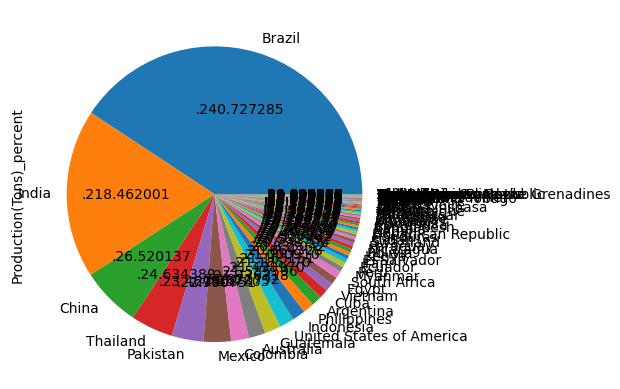

In [35]:
df_new["Production(Tons)_percent"].plot(kind = "pie" , autopct = ".2%f")

#### Brazil, China and India have 65% of production of sugarcane

<Axes: xlabel='Country'>

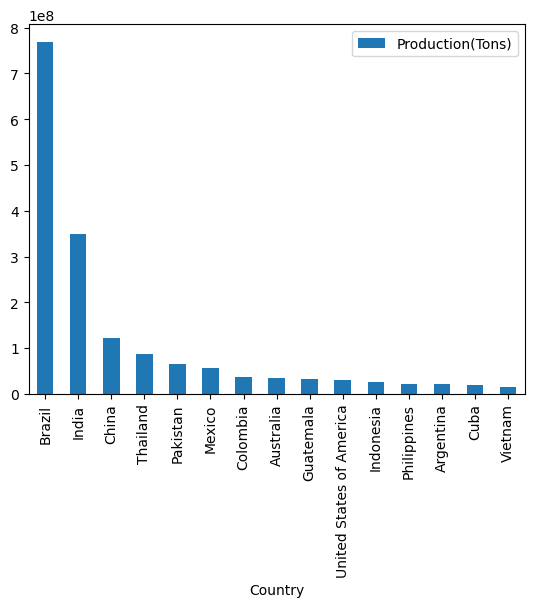

In [36]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind="bar")

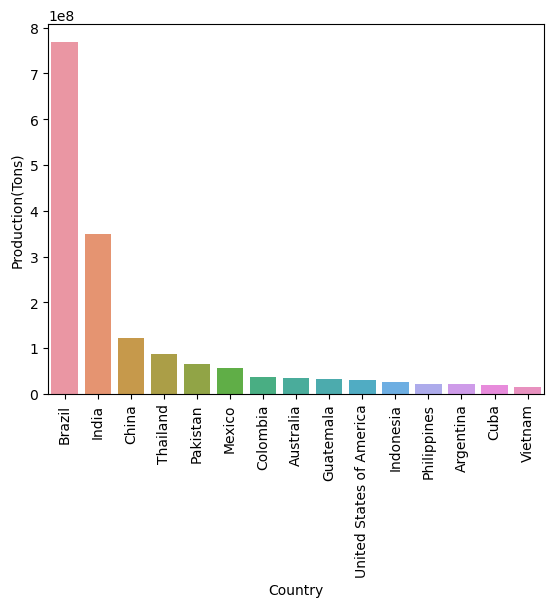

In [37]:
ax = sns.barplot(data = df.head(15), x = "Country", y = "Production(Tons)") 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Which country has highest land?

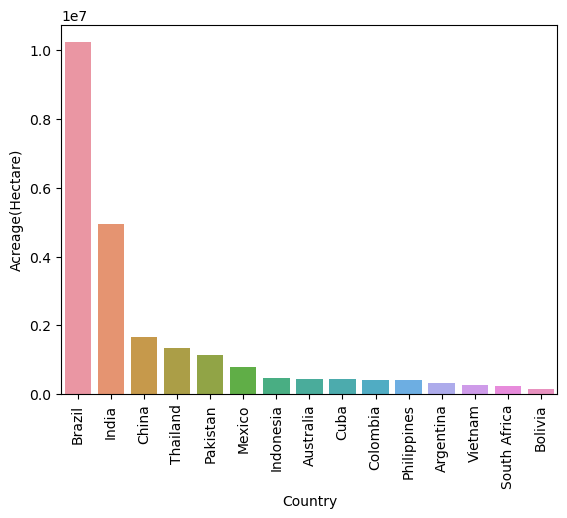

In [38]:
df_acre = df.sort_values("Acreage(Hectare)",ascending = False).head(15)
ax = sns.barplot(data = df_acre, x = "Country", y = "Acreage(Hectare)") 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Which country has highest yeild per hectare?

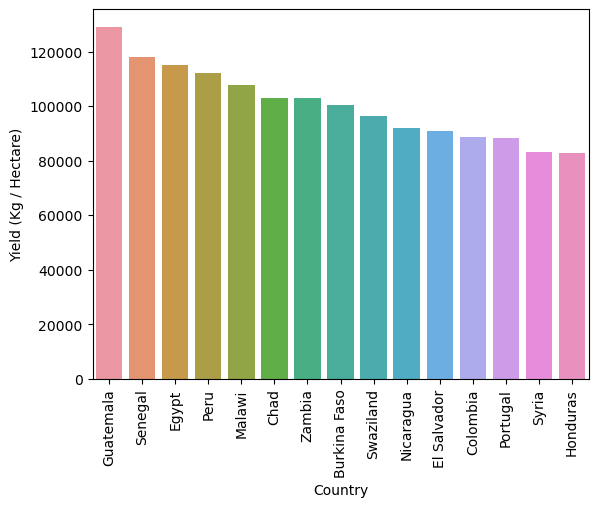

In [39]:
df_yeild = df.sort_values("Yield (Kg / Hectare)",ascending = False).head(15)
ax = sns.barplot(data = df_yeild, x = "Country", y = "Yield (Kg / Hectare)") 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Which country has highest production?

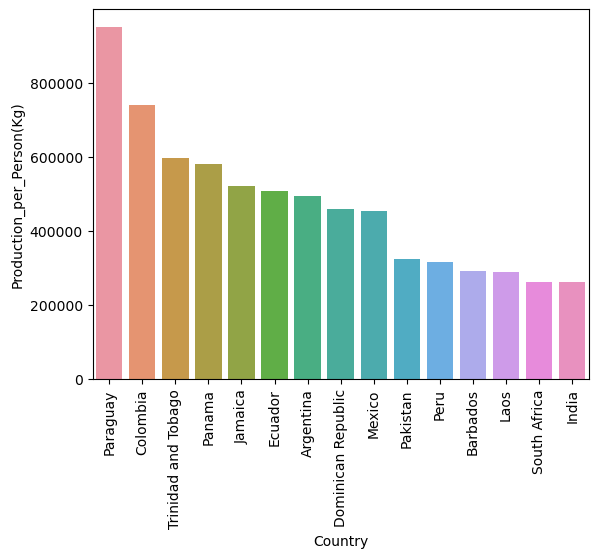

In [40]:
df_production = df.sort_values("Production_per_Person(Kg)",ascending = False).head(15)
ax = sns.barplot(data = df_production, x = "Country", y = "Production_per_Person(Kg)") 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

# Correlation

In [41]:
df.corr()

C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\1175304446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Greens")


<Axes: >

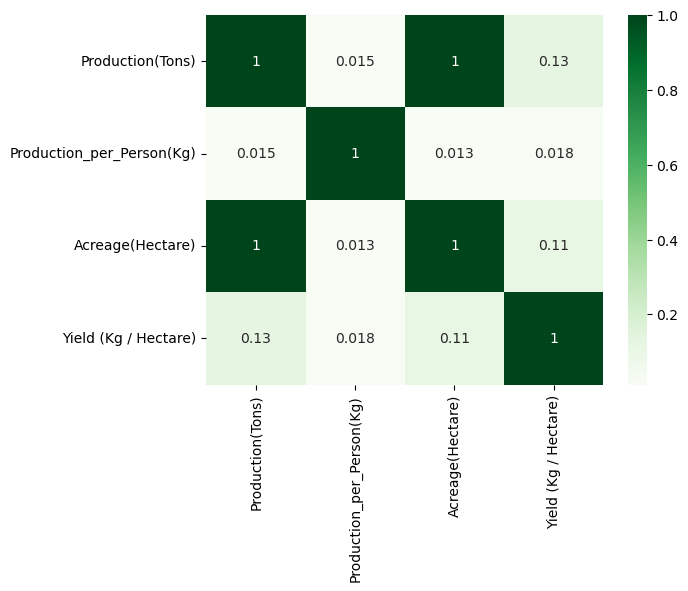

In [42]:
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

### Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

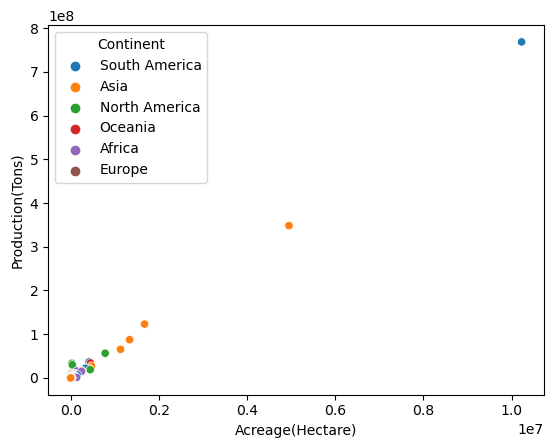

In [43]:
sns.scatterplot(data=df , x="Acreage(Hectare)", y="Production(Tons)", hue="Continent")

Overall increase in land increases the production

###  Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production(Tons)'>

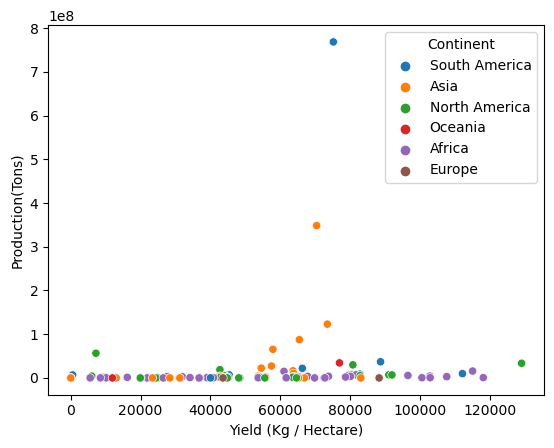

In [45]:
sns.scatterplot(data=df , x="Yield (Kg / Hectare)", y="Production(Tons)", hue="Continent")

In [46]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Analysis for Continent

In [47]:
df_continent = df.groupby("Continent").sum()

C:\Users\ZIA\AppData\Local\Temp\ipykernel_4828\651574453.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent = df.groupby("Continent").sum()


In [48]:
df_continent["no_of_countries"] = df.groupby("Continent").count()["Country"]

In [49]:
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare),no_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


### Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

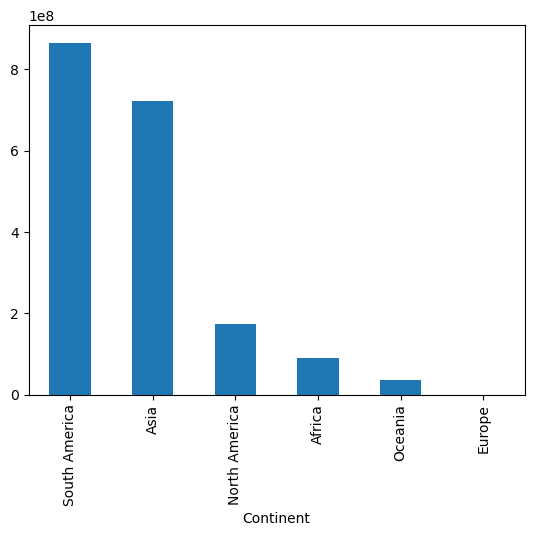

In [50]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind = "bar")

### Do number of countries in a Continent effects production of sugarcane?

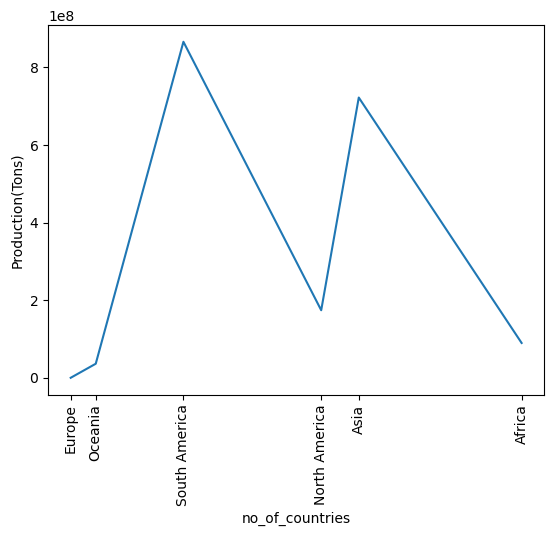

In [56]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent, x = "no_of_countries", y = "Production(Tons)")
plt.xticks(df_continent["no_of_countries"], continent_names, rotation=90)
plt.show()

### Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

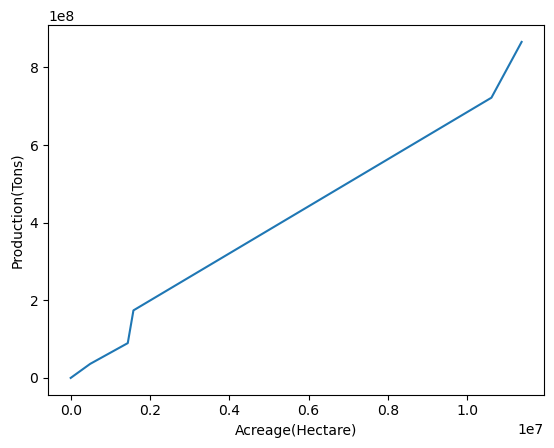

In [58]:
sns.lineplot(data=df_continent, x = "Acreage(Hectare)", y = "Production(Tons)")

## Production distribution by continent

<function matplotlib.pyplot.show(close=None, block=None)>

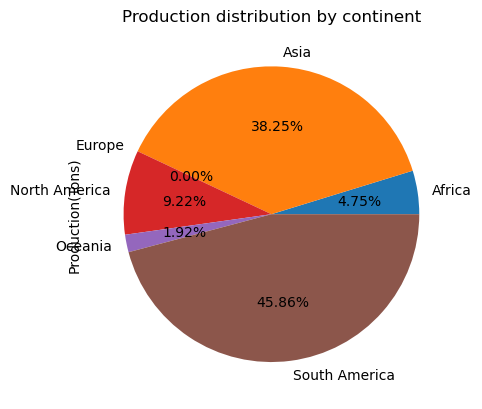

In [59]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title("Production distribution by continent")
plt.show

## Correlation for continent

In [60]:
df_continent.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield (Kg / Hectare),no_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
no_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
